# GastoML


## Mount Colab

once the account is mount check your drive route

In [1]:
from google.colab import drive
drive.mount("/content/drive")
# cd to a folder in your Drive - in my case is this route
%cd '/content/drive/Othercomputers/Mi portátil/gastroml/src'

Mounted at /content/drive
/content/drive/Othercomputers/Mi portátil/gastroml/src


In [2]:
# Check working directory
!ls

 args.py				   my_checkpoint.pth.tar
 build_vocab.py				   __pycache__
 data_loader.py				   runs
 demo.ipynb				   sample.py
'gastroML - ImageCaptioning.ipynb'	   test_greedy_gencaps.pkl
 gastroML-train.ipynb			   train.py
'gastroML-train -Test conv models.ipynb'   utils
 model.py				   utils_imgTocap.py
 modules


## Install required libraries and import them

In [3]:
!pip install -q lmdb &> /dev/null
!pip install -q tensorboardX &> /dev/null
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
### Code taken from *Machine Translation Jupyter Notebook.  (c) 2021 Georgia Tech*

# Just run this block. Please do not modify the following code.
import math
import time
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from IPython.display import Image

# Pytorch package
import torch
import torch.nn as nn
import torch.optim as optim

# Torchtest package
import torchtext
from torchtext.datasets import Multi30k
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import vocab
from torchtext.utils import download_from_url, extract_archive
from torch.nn.utils.rnn import pad_sequence

# Tqdm progress bar
from tqdm import tqdm_notebook, tqdm

# Code provide to you for training and evaluation
# from utils import train, evaluate, set_seed_nb, unit_test_values, deterministic_init, plot_curves

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from collections import Counter
import itertools
from itertools import combinations, chain
import ast
import lmdb

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


### instructions from read

In [ ]:
# 1 - build vocabularies
!python build_vocab.py --recipe1m_path '../Kaggle data/'

Loading data...
Loaded data.
Found 10050 recipes in the dataset.
10050it [00:27, 371.59it/s]
Total ingr vocabulary size: 485
Total token vocabulary size: 2859
10050it [00:18, 550.73it/s]
Dataset size:
train : 4624
val : 1506
test : 1530


# model image Resnet50

In [ ]:
# 2- Ingredient prediction from images
# batch size was reduce from 150 to 100 due to memory error on the GPU
!python train.py --model_name im2ingr --num_epochs 50 --batch_size 100 --finetune_after 0 --ingrs_only --es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 --learning_rate 1e-4 --scale_learning_rate_cnn 1.0 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

In [ ]:
#!python train.py --model_name model --batch_size 256 --recipe_only --transfer_from im2ingr --save_dir ../checkpoints --recipe1m_dir path_to_dataset
!python train.py --model_name model --batch_size 50 --num_epochs 50 --recipe_only --transfer_from im2ingr --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

In [ ]:
!python sample.py --model_name model --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/' --greedy --eval_split test

# model image resnet18


In [ ]:
# 2- Ingredient prediction from images
# batch size was reduce from 150 to 100 due to memory error on the GPU
!python train.py --model_name im2ingrResnet18 --num_epochs 50 --batch_size 100 --image_model resnet18 --finetune_after 0 --ingrs_only --es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 --learning_rate 1e-4 --scale_learning_rate_cnn 1.0 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/im2ingrResnet18/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='im2ingrResnet18', transfer_from='', suff='', image_model='resnet18', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=1.0, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=100, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=0, loss_weight=[0.0, 1000.0, 1.0, 1.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=True, recipe_only=False, log_term=False, tensorboard=True, resume=False, 

In [ ]:
#!python train.py --model_name model --batch_size 256 --recipe_only --transfer_from im2ingr --save_dir ../checkpoints --recipe1m_dir path_to_dataset
!python train.py --model_name modeResnet18 --image_model=resnet18 --batch_size 50 --num_epochs 50 --recipe_only --transfer_from im2ingrResnet18 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/modeResnet18/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='modeResnet18', transfer_from='im2ingrResnet18', suff='', image_model='resnet18', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=0.01, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=-1, loss_weight=[1.0, 0.0, 0.0, 0.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=False, recipe_only=True, log_term=False, tensorboard=True, resume=

In [6]:
!python sample.py --model_name modeResnet18 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/' --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/modeResnet18/logs/eval.log


# Resnet101

In [ ]:
!python train.py --model_name im2ingrResnet101 --num_epochs 50 --batch_size 50 --image_model resnet101 --finetune_after 0 --ingrs_only --es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 --learning_rate 1e-4 --scale_learning_rate_cnn 1.0 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/im2ingrResnet101/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='im2ingrResnet101', transfer_from='', suff='', image_model='resnet101', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=1.0, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=0, loss_weight=[0.0, 1000.0, 1.0, 1.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=True, recipe_only=False, log_term=False, tensorboard=True, resume=False

In [ ]:
!python train.py --model_name modeResnet101 --image_model=resnet101 --batch_size 50 --num_epochs 50 --recipe_only --transfer_from im2ingrResnet101 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/modeResnet101/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='modeResnet101', transfer_from='im2ingrResnet101', suff='', image_model='resnet101', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=0.01, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=-1, loss_weight=[1.0, 0.0, 0.0, 0.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=False, recipe_only=True, log_term=False, tensorboard=True, res

In [7]:
!python sample.py --model_name modeResnet101 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/' --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/modeResnet101/logs/eval.log


# Resnet152

In [ ]:
!python train.py --model_name im2ingrResnet152 --num_epochs 50 --batch_size 50 --image_model resnet152 --finetune_after 0 --ingrs_only --es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 --learning_rate 1e-4 --scale_learning_rate_cnn 1.0 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/im2ingrResnet152/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='im2ingrResnet152', transfer_from='', suff='', image_model='resnet152', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=1.0, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=0, loss_weight=[0.0, 1000.0, 1.0, 1.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=True, recipe_only=False, log_term=False, tensorboard=True, resume=False

In [ ]:
!python train.py --model_name modelResnet152 --image_model resnet152 --batch_size 50 --num_epochs 50 --recipe_only --transfer_from im2ingrResnet152 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/modelResnet152/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='modelResnet152', transfer_from='im2ingrResnet152', suff='', image_model='resnet152', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=0.01, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=50, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=-1, loss_weight=[1.0, 0.0, 0.0, 0.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=False, recipe_only=True, log_term=False, tensorboard=True, r

In [8]:
!python sample.py --model_name modelResnet152 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/' --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/modelResnet152/logs/eval.log


# Inception_v3

In [ ]:
!python train.py --model_name im2ingrInceptionV3 --num_epochs 2 --batch_size 50 --image_model inception_v3 --finetune_after 0 --ingrs_only --es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 --learning_rate 1e-4 --scale_learning_rate_cnn 1.0 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/im2ingrInceptionV3/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='im2ingrInceptionV3', transfer_from='', suff='', image_model='inception_v3', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=1.0, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=2, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=0, loss_weight=[0.0, 1000.0, 1.0, 1.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=True, recipe_only=False, log_term=False, tensorboard=True, resume

In [ ]:
!python train.py --model_name modelInceptionV3 --image_model inception_v3 --batch_size 50 --num_epochs 2 --recipe_only --transfer_from im2ingrInceptionV3 --save_dir ../checkpoints --recipe1m_dir '../Kaggle data/'

Training logs will be saved to: ../checkpoints/inversecooking/modelInceptionV3/logs/train.log
Test - SZ
Namespace(save_dir='../checkpoints', project_name='inversecooking', model_name='modelInceptionV3', transfer_from='im2ingrInceptionV3', suff='', image_model='inception_v3', recipe1m_dir='../Kaggle data/', aux_data_dir='../data', crop_size=224, image_size=256, log_step=10, learning_rate=0.0001, scale_learning_rate_cnn=0.01, lr_decay_rate=0.99, lr_decay_every=1, weight_decay=0.0, embed_size=512, n_att=8, n_att_ingrs=4, transf_layers=16, transf_layers_ingrs=4, num_epochs=2, batch_size=50, num_workers=8, dropout_encoder=0.3, dropout_decoder_r=0.3, dropout_decoder_i=0.3, finetune_after=-1, loss_weight=[1.0, 0.0, 0.0, 0.0], max_eval=4096, label_smoothing_ingr=0.1, patience=50, maxseqlen=15, maxnuminstrs=10, maxnumims=5, maxnumlabels=20, es_metric='iou_sample', eval_split='val', numgens=3, greedy=False, temperature=1.0, beam=-1, ingrs_only=False, recipe_only=True, log_term=False, tensorboard

Compare metrics and performance


Eval logs will be saved to: ../checkpoints/inversecooking/model/logs/eval.log


In [ ]:
!ls

 args.py	  gastroML-train.ipynb			    __pycache__		      utils
 build_vocab.py  'gastroML-train -Test conv models.ipynb'   sample.py
 data_loader.py   model.py				    test_greedy_gencaps.pkl
 demo.ipynb	  modules				    train.py


In [ ]:
# Open the file in binary read mode
import pickle
filename = 'test_greedy_gencaps.pkl'
with open(filename, 'rb') as file:
    # Load the data from the file
    data = pickle.load(file)


In [ ]:
data.keys()

dict_keys(['recipes', 'ingrs', 'ingr_iou'])

In [ ]:
data["recipes"][7]

[array([ 895,  895,    2,   67,   37,   92,  252,    9,   60,  121,  895,
           9,  895,    9,  895,    9,   17,   16,   15,  212,   67,  121,
         895,   17,  212,   43,   60,   15,    2,   67,   37, 1390, 1391,
           9,   60,  121,  784,  370,    9,  784,  370,    9,   17,  369,
         370,   15,    2,    1,    6,   37, 1390, 1391,   15,  413,    6,
         784,  370,   17,  413,    6,  784, 2071,   15,    2,    1,   17,
         413,    6,  784,   53,   15,    2,    1,   17,  413,    6,  784,
          53,   15,  413,    6,  784,   53,   15,  413,    6,  784,   53,
          15,  413,    6,  784,   53,   15,  413,    6,  784,   53,   15,
         413,    6,  784,   53,   15,  413,    6,  784,   53,   15,  413,
           6,  784,   53,   15,  413,    6,  784,   53,   15,  413,    6,
         784,   53,   15,  413,    6,  413,    6,  784,   53,   15,  413,
           6,  413,    6,  784,   53,   15,  413,    6,  784,   53,   15,
         413,    6,  413,    6,  784, 

In [ ]:
data["ingrs"]

{7: [array([ 34,  35,  85,  62,  90, 484, 484, 484, 484, 484, 484, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 8: [array([ 16,   2,   9,  19,   3,  40,  53,  34,  39,  28,  15, 383,  85,
          11, 484, 484, 484, 484, 484, 484])],
 11: [array([ 16,   2,   9,  19,   3,  47,  11,  34,  40, 484, 484, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 15: [array([ 16,   2,   9,  19,   3,  40,  47,  11,  34,  53, 484, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 26: [array([ 16,   2,   9,  19,   3,  40,  11,  34,  35,  53,  47, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 39: [array([ 16,   2,   9,   8,   3,  18,   6,  23,  35, 484, 484, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 41: [array([ 67,  16,  34,  35,  23,  62, 110, 100, 484, 484, 484, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 42: [array([ 16,  67,   2,   9,   8,  18,   6, 138, 110,  23, 112, 484, 484,
         484, 484, 484, 484, 484, 484, 484])],
 4

# Simple EDA of the dataset


## load and check datasets

In [ ]:
# load csv
df = pd.read_csv("Food Ingredients and Recipe Dataset with Image Name Mapping_CLEANED.csv")

# Check combinations and unique ingredients

In [ ]:
df[["Cleaned_Ingredients",	"Ingredients_RawMats"]].head(2)
df.loc[100,"Ingredients_RawMats"]

"['onion', 'oil', 'garlic', 'yogurt', 'rice', 'pepper', 'the', 'tomato', 'get', 'zucchini', 'seeds', 'onions', 'salt', 'see', 'eggplants', 'chile']"

### count of unique list of ingredients

In [ ]:
unique_ingredient_list = df['Ingredients_RawMats'].unique()
count_ingredient_list = {string: df['Ingredients_RawMats'].tolist().count(string) for string in unique_ingredient_list}
count_matriz = pd.DataFrame(list(count_ingredient_list.items()), columns=['String', 'count'])


In [ ]:
# unique count of ingredients
count_matriz[count_matriz["count"]>1].head()

,String,count
32,[],143
147,['lime'],2
252,['coconut'],2
346,['lemon'],3
349,"['bitters', 'cherry', 'whiskey', 'vermouth']",4


In [ ]:
# there are 143 rows with empty rawMats
df[df["Ingredients_RawMats"]=='[]']

,Id,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,Ingredients_RawMats
32,32,Green Seasoning,"['3 Tbsp. chopped fresh chives', '1 Tbsp. chop...",Process all the ingredients in a food processo...,trinidadian-green-seasoning,"['3 Tbsp. chopped fresh chives', '1 Tbsp. chop...",[]
35,35,Remember the Alimony,"['¾ oz (22 ml) London Dry gin', '1½ oz (45 ml)...",Combine all the ingredients in a chilled rocks...,remember-the-alimony-cocktail,"['¾ oz (22 ml) London Dry gin', '1½ oz (45 ml)...",[]
119,119,Pajeon Sauce,"['2 tablespoons water', '2 tablespoons rice vi...",Combine all the ingredients in a bowl and mix ...,pajeon-sauce,"['2 tablespoons water', '2 tablespoons rice vi...",[]
174,174,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-simonson-3-ingredient-cocktails,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",[]
230,230,Cosmonaut,"['2 ounces gin', '¾ ounce lemon juice', '1 bar...",Combine all the ingredients in a cocktail shak...,cosmonaut-cocktail-petraske-simonson,"['2 ounces gin', '¾ ounce lemon juice', '1 bar...",[]
...,...,...,...,...,...,...,...
13097,13105,White Spider,"['3/4 to1 ounce white crème de menthe', '1 1/2...",Combine all ingredients in a mixing glass and ...,white-spider-200265,"['3/4 to1 ounce white crème de menthe', '1 1/2...",[]
13098,13106,Fireworks,"['1/4 ounce grenadine syrup', '1/4 ounce crème...","Pour all the ingredients, in the order listed,...",fireworks-200267,"['1/4 ounce grenadine syrup', '1/4 ounce crème...",[]
13099,13107,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-200069,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",[]
13151,13159,Rémoulade Sauce,"['3/4 cup mayonnaise', '2 teaspoons Dijon must...","Combine ingredients in a bowl. Set aside, cove...",remoulade-sauce-106731,"['3/4 cup mayonnaise', '2 teaspoons Dijon must...",[]


### counting and matrix combinations of ingredients

In [ ]:
df['Ingredients_RawMats_list'] = df['Ingredients_RawMats'].apply(ast.literal_eval)

words = [word for list_words in df['Ingredients_RawMats_list'] for word in list_words]
count_words = Counter(words)
matrix_count = pd.DataFrame(count_words.items(), columns=['word', 'count'])


In [ ]:
matrix_count.sort_values(by="count",ascending=False).head()

,word,count
16,salt,8356
1,oil,7079
9,pepper,4771
39,sugar,4435
8,butter,4164


In [ ]:
count_dict = {}
for ingridient_list in df['Ingredients_RawMats_list']:
  combinations_possibles = combinations(ingridient_list, 2)
  for combinacion in combinations_possibles:
    count_dict[str(combinacion)] = count_dict.get(str(combinacion),0)+1

In [ ]:
tuple_keys = [ast.literal_eval(key) for key in count_dict.keys()]

# Crear el DataFrame
comb_df = pd.DataFrame(tuple_keys, columns=['Element_1', 'Element_2'])
comb_df['count'] = count_dict.values()

#pd.DataFrame(np.sort(comb_df[['Element_1', 'Element_2']].values, axis=1), index=comb_df.index)
comb_df[['Element_1', 'Element_2']] = pd.DataFrame(np.sort(comb_df[['Element_1', 'Element_2']].values, axis=1), index=comb_df.index)

# Agrupar por los elementos normalizados y sumar los conteos
comb_sum_df = comb_df.groupby(['Element_1', 'Element_2'], as_index=False)['count'].sum()


In [ ]:
comb_sum_df[~comb_sum_df["Element_1"].isin(['oil', 'pepper', 'garlic', 'butter', 'salt', 'flour', 'juice',
       'lemon', 'onion'])].sort_values(by="count",ascending=False).head(20)

,Element_1,Element_2,count
74015,cream,salt,1388
89432,eggs,salt,1367
74184,cream,sugar,1354
180281,sugar,vanilla,1351
88119,egg,salt,1149
137281,milk,salt,1066
147379,olive,salt,1062
88269,egg,sugar,1016
89593,eggs,sugar,971
180313,sugar,water,971


In [ ]:
#comb_df[(comb_df["Element_1"]=="oil") & (comb_df["Element_2"]=="salt")]
#comb_df[(comb_df["Element_2"]=="oil") & (comb_df["Element_1"]=="salt")]
comb_sum_df[(comb_sum_df["Element_2"]=="oil") & (comb_sum_df["Element_1"]=="salt")]

In [ ]:
comb_sum_df_pv = comb_sum_df.pivot_table(index="Element_1",columns="Element_2",aggfunc="sum",values="count")
comb_sum_df_pv.head()

Element_2,all,allspice,almond,almonds,aluminum,amaranth,amarena,amaretti,amaretto,amarillo,...,zest,zested,zester,zhoug,ziti,zucchini,árbol,épices,ñame,ﬂour
Element_1,,,,,,,,,,,,,,,,,,,,,
above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absinthe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accompaniment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accompaniments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
according,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Element_2', ylabel='Element_1'>

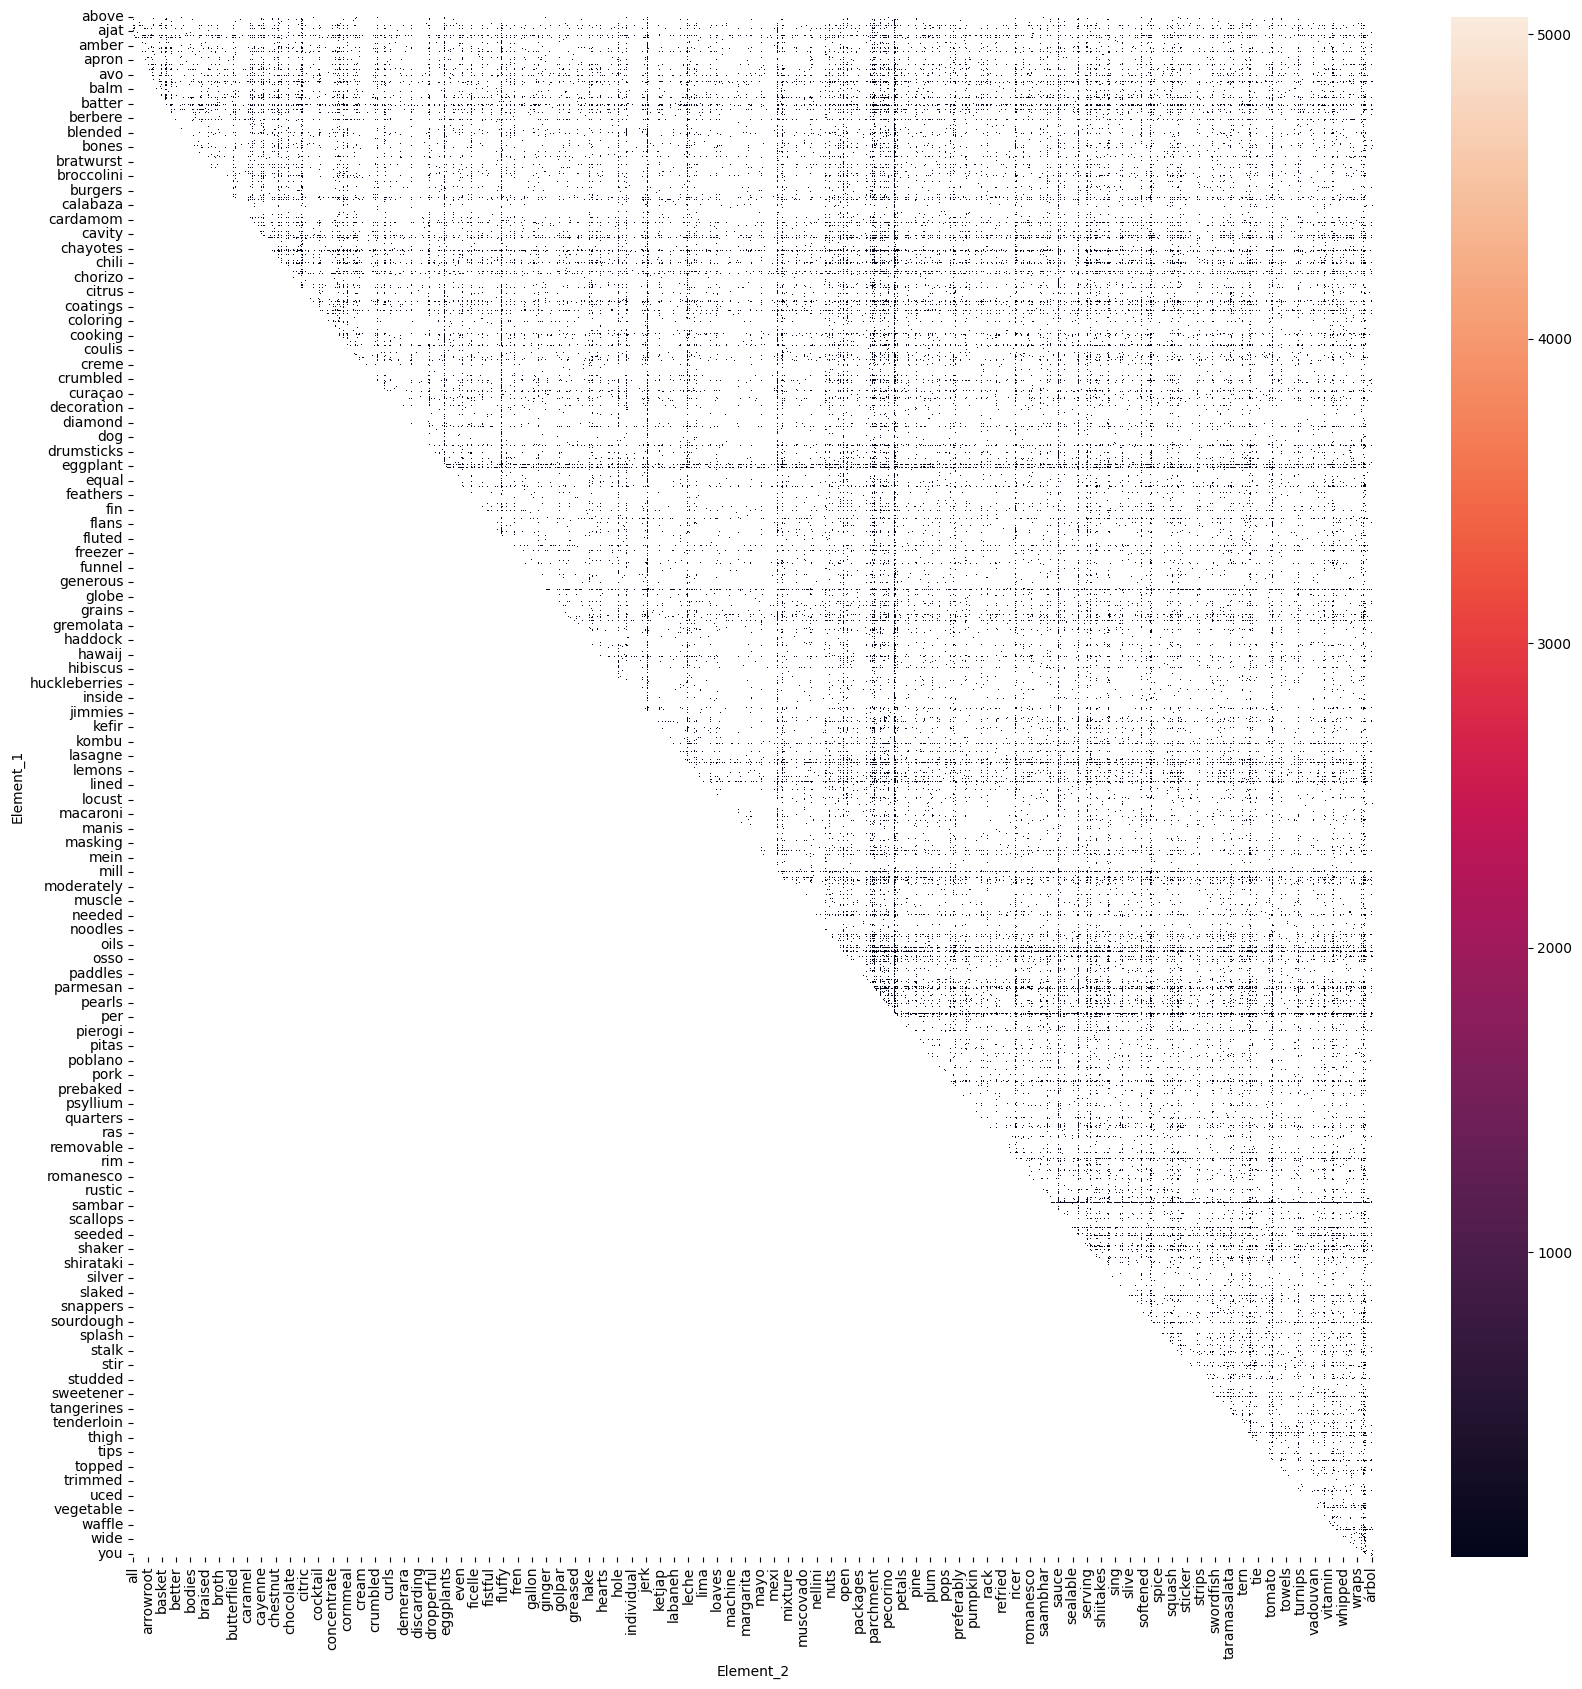

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(comb_sum_df_pv)

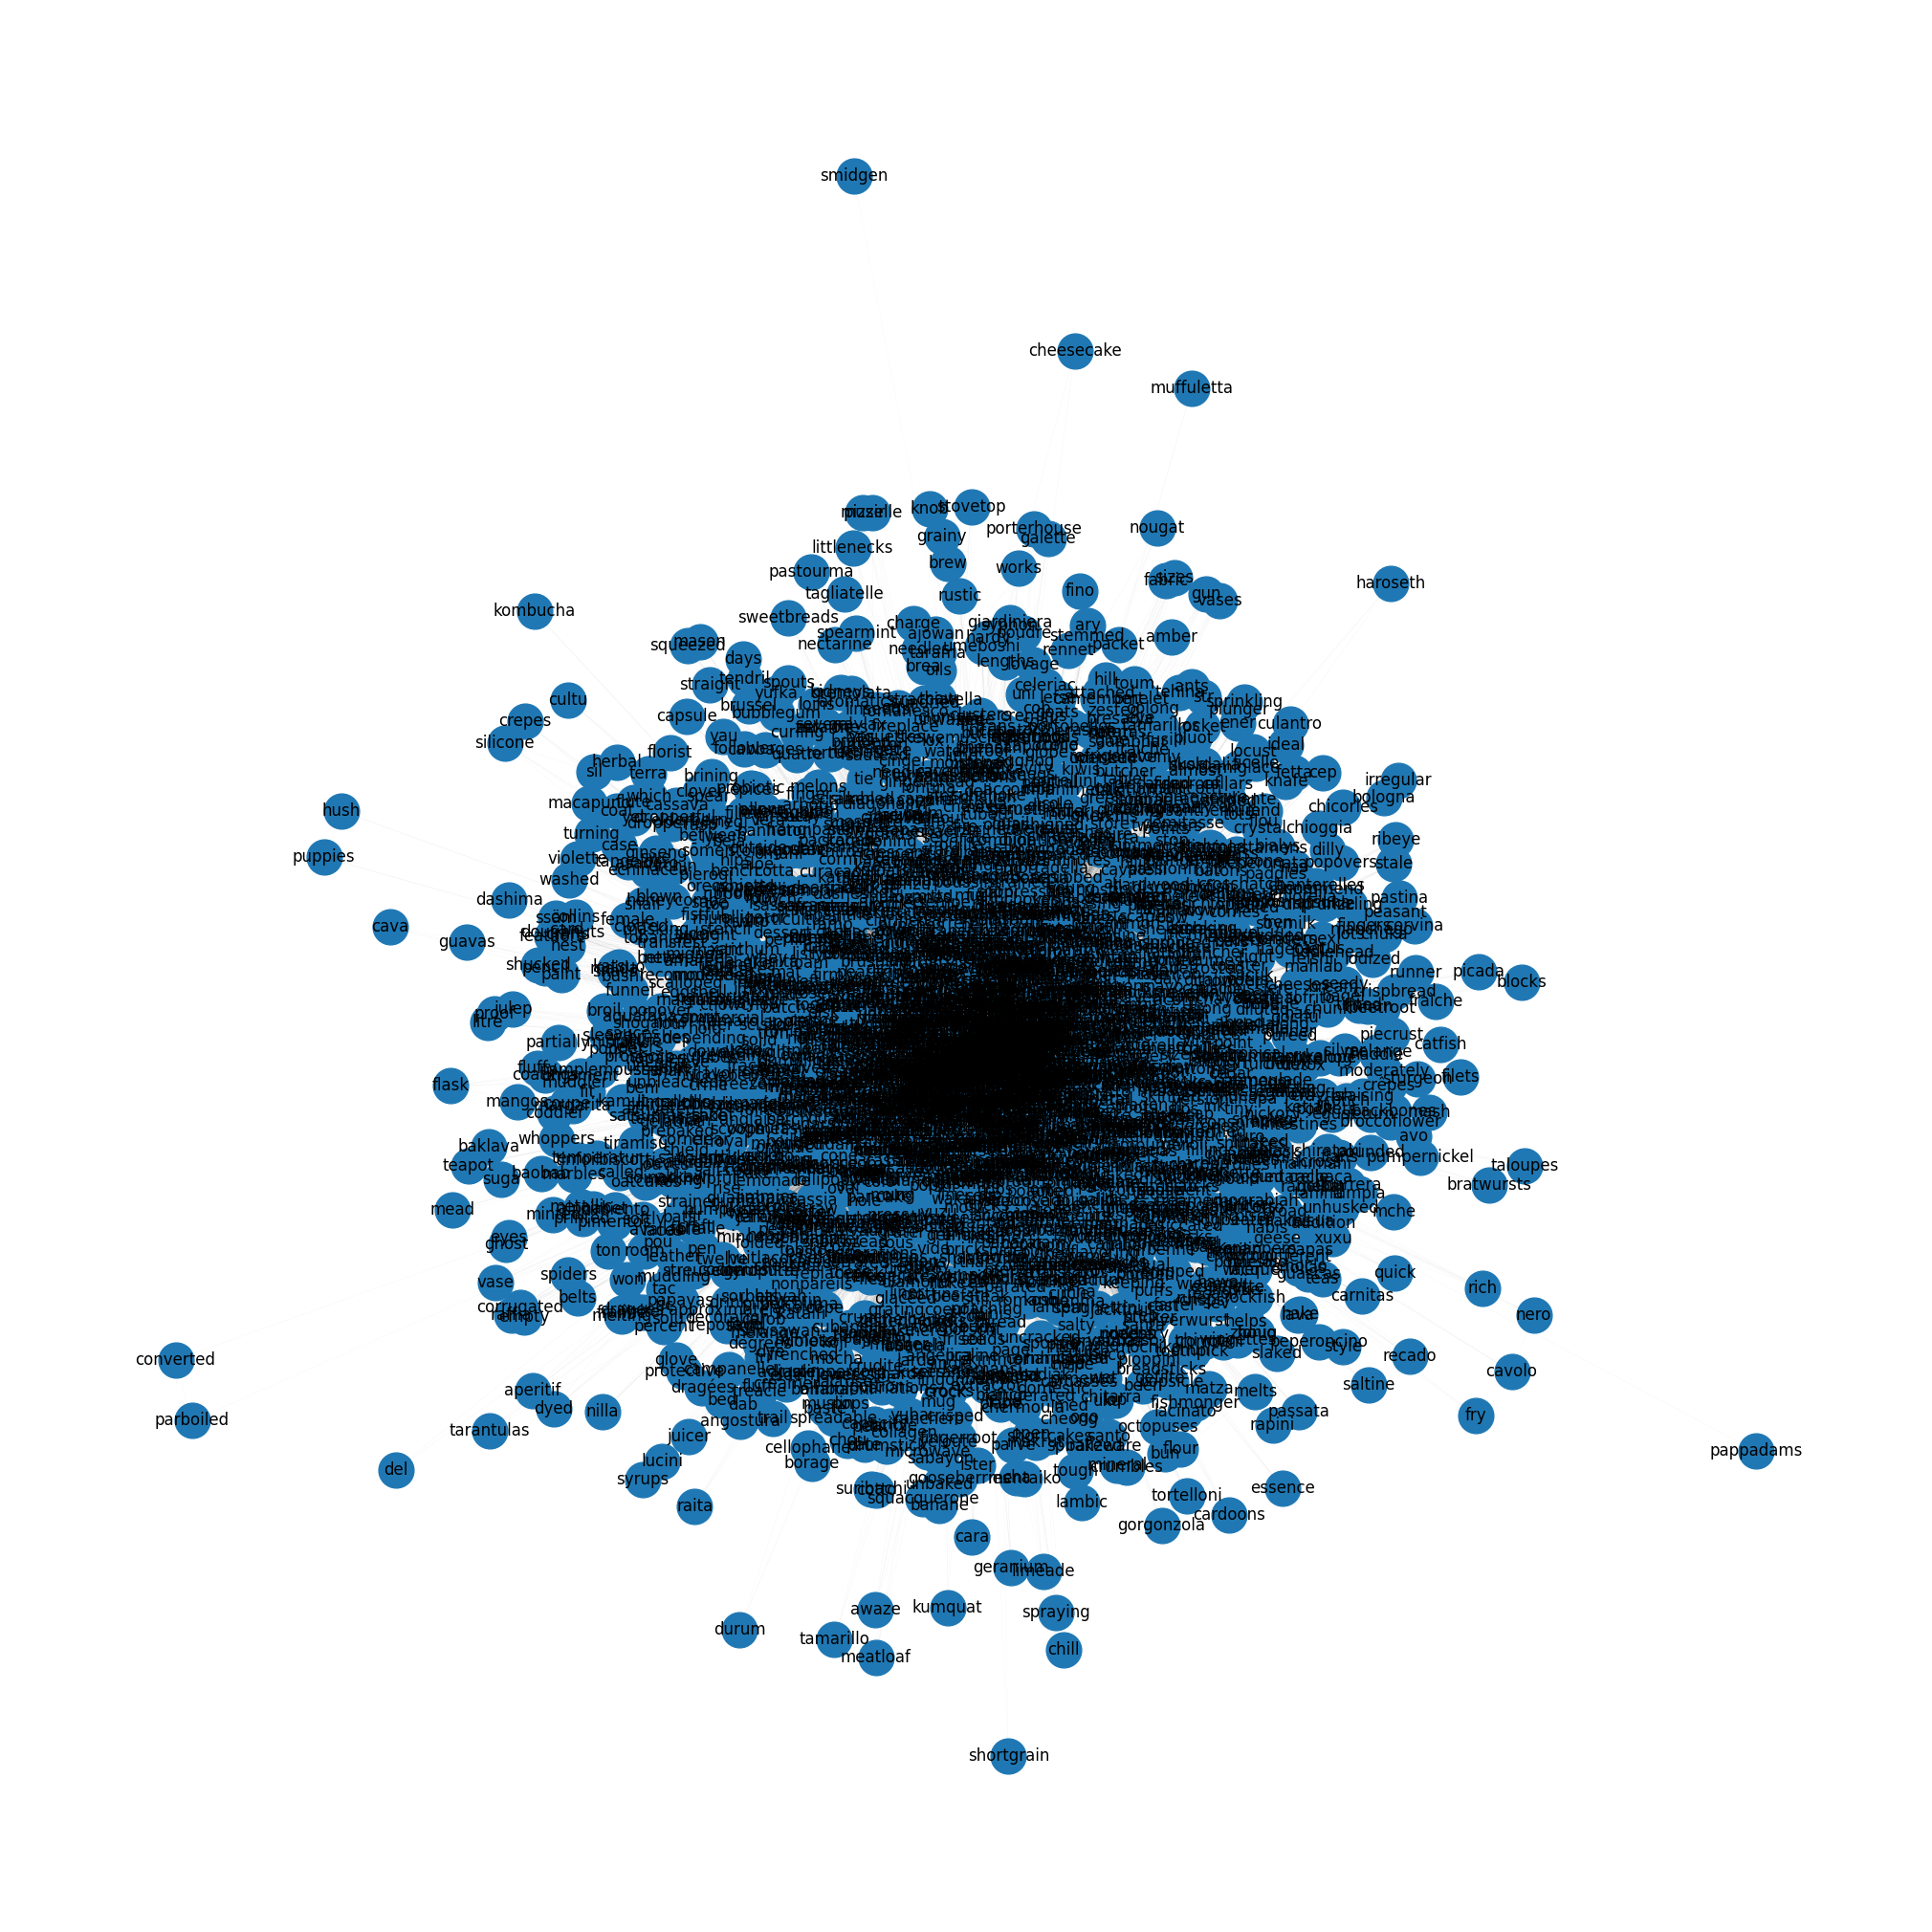

In [ ]:
import networkx as nx

# Crear el grafo
G = nx.Graph()

# Agregar aristas con el conteo como peso
for index, row in comb_sum_df.iterrows():
    G.add_edge(row['Element_1'], row['Element_2'], weight=row['count'])

# Dibujar el grafo
# Ajustar el tamaño de los nodos/aristas basado en el peso (puedes ajustar este mapeo según tus necesidades)
plt.figure(figsize=(20, 20))
edge_widths = [G[u][v]['weight'] / 100.0 for u, v in G.edges()]
pos = nx.spring_layout(G)  # Posicionamiento de los nodos

nx.draw(G, pos, with_labels=True, width=edge_widths, node_size=700)
plt.show()
